In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
# Search for missing and null values


(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'magnesium'}>],
       [<AxesSubplot:title={'center':'color_intensity'}>, <AxesSubplot:>]],
      dtype=object)

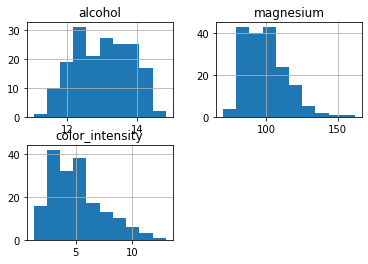

In [5]:
#Let's show the histograms of the variables alcohol, magnesium and color_intensity.
data[['alcohol','magnesium','color_intensity']].hist()

In [6]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

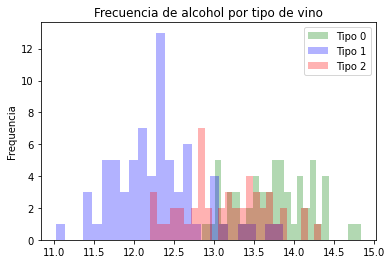

In [7]:
# Alcohol variable histograms.
x1 = data.loc[data.target==0, 'alcohol']
x2 = data.loc[data.target==1, 'alcohol']
x3 = data.loc[data.target==2, 'alcohol']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de alcohol por tipo de vino', ylabel='Frequencia')

plt.legend();

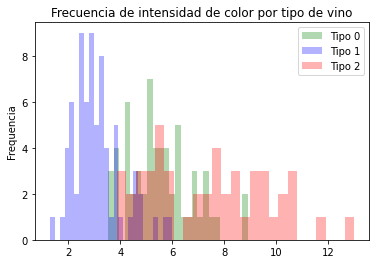

In [8]:
#Color_intensity histograms

x1 = data.loc[data.target==0, 'color_intensity']
x2 = data.loc[data.target==1, 'color_intensity']
x3 = data.loc[data.target==2, 'color_intensity']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de intensidad de color por tipo de vino', ylabel='Frequencia')

plt.legend();

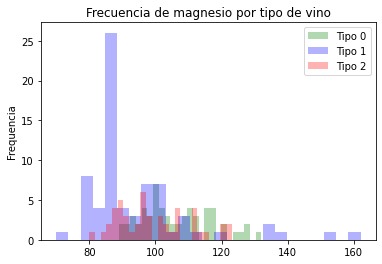

In [9]:
#Magnesium histograms

x1 = data.loc[data.target==0, 'magnesium']
x2 = data.loc[data.target==1, 'magnesium']
x3 = data.loc[data.target==2, 'magnesium']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de magnesio por tipo de vino', ylabel='Frequencia')

plt.legend();

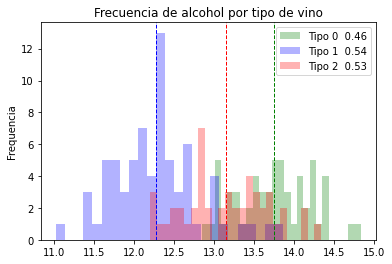

In [10]:
#Alcohol histograms with the mean and the standard deviation.

x1 = data.loc[data.target==0, 'alcohol']
x2 = data.loc[data.target==1, 'alcohol']
x3 = data.loc[data.target==2, 'alcohol']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0'+  str("{:6.2f}".format(x1.std())))
plt.hist(x2, **kwargs, color='b', label='Tipo 1'+  str("{:6.2f}".format(x2.std())))
plt.hist(x3, **kwargs, color='r', label='Tipo 2'+  str("{:6.2f}".format(x3.std())))
plt.gca().set(title='Frecuencia de alcohol por tipo de vino', ylabel='Frequencia')
plt.axvline(x1.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x2.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend();

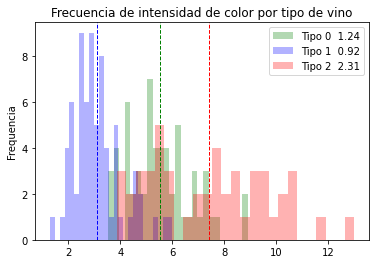

In [11]:
#color_intensity histograms with the mean and the standard deviation..


x1 = data.loc[data.target==0, 'color_intensity']
x2 = data.loc[data.target==1, 'color_intensity']
x3 = data.loc[data.target==2, 'color_intensity']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0'+  str("{:6.2f}".format(x1.std())))
plt.hist(x2, **kwargs, color='b', label='Tipo 1'+  str("{:6.2f}".format(x2.std())))
plt.hist(x3, **kwargs, color='r', label='Tipo 2'+  str("{:6.2f}".format(x3.std())))
plt.gca().set(title='Frecuencia de intensidad de color por tipo de vino', ylabel='Frequencia')
plt.axvline(x1.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x2.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend();

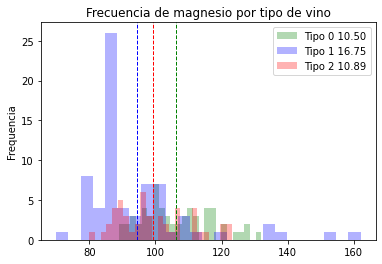

In [12]:
#magnesium histograms with the mean and the standard deviation..


x1 = data.loc[data.target==0, 'magnesium']
x2 = data.loc[data.target==1, 'magnesium']
x3 = data.loc[data.target==2, 'magnesium']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0'+  str("{:6.2f}".format(x1.std())))
plt.hist(x2, **kwargs, color='b', label='Tipo 1'+  str("{:6.2f}".format(x2.std())))
plt.hist(x3, **kwargs, color='r', label='Tipo 2'+  str("{:6.2f}".format(x3.std())))
plt.gca().set(title='Frecuencia de magnesio por tipo de vino', ylabel='Frequencia')
plt.axvline(x1.mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x2.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='r', linestyle='dashed', linewidth=1)
plt.legend();

In [13]:
#Correlation table
df=data[['alcohol','magnesium','color_intensity']]
df.corr()

,alcohol,magnesium,color_intensity
alcohol,1.000000,0.270798,0.546364
magnesium,0.270798,1.000000,0.199950
color_intensity,0.546364,0.199950,1.000000


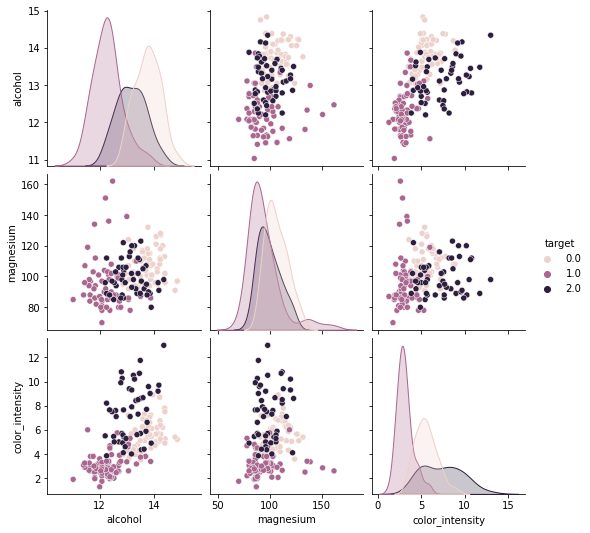

In [14]:
#scatter plots
df=data[['alcohol','magnesium','color_intensity','target']]
sns.pairplot(df,hue='target')

In [15]:
 #Import standardscaler
from sklearn.preprocessing import StandardScaler

#Remove target columns.
x = data.loc[:,data.columns != 'target'].values
y = data.loc[:,['target']].values

#Scale the data
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)
# Create PCA object.
pca = PCA(n_components=2)

#Run PCA.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [16]:
# Join again the target variable

finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf.head()

,PC 1,PC 2,target
0,3.316751,-1.443463,0.0
1,2.209465,0.333393,0.0
2,2.516740,-1.031151,0.0
3,3.757066,-2.756372,0.0
4,1.008908,-0.869831,0.0


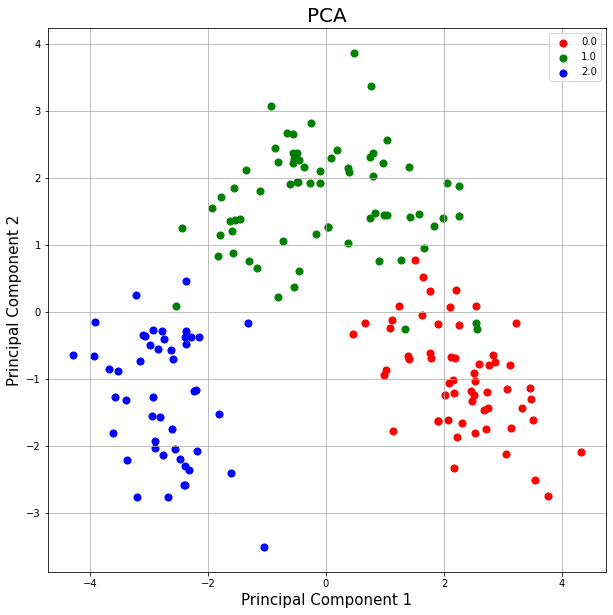

In [17]:
# Show the graphics.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
#Use same variables as in the previous point, they are already standarized
# Create TSNE object.
X_embedded = TSNE(n_components=2,perplexity=15,random_state=42).fit_transform(x)

tsneDf = pd.DataFrame(data = X_embedded
             , columns = ['PC 1', 'PC 2'])

tsneDf.head()

,PC 1,PC 2
0,24.224854,7.266065
1,15.240703,8.397134
2,18.322884,17.680305
3,25.254492,17.822229
4,15.645270,22.721230


In [19]:
# Join the target variable

ftnseDf = pd.concat([tsneDf, data[['target']]], axis = 1)
ftnseDf.head()

,PC 1,PC 2,target
0,24.224854,7.266065,0.0
1,15.240703,8.397134,0.0
2,18.322884,17.680305,0.0
3,25.254492,17.822229,0.0
4,15.645270,22.721230,0.0


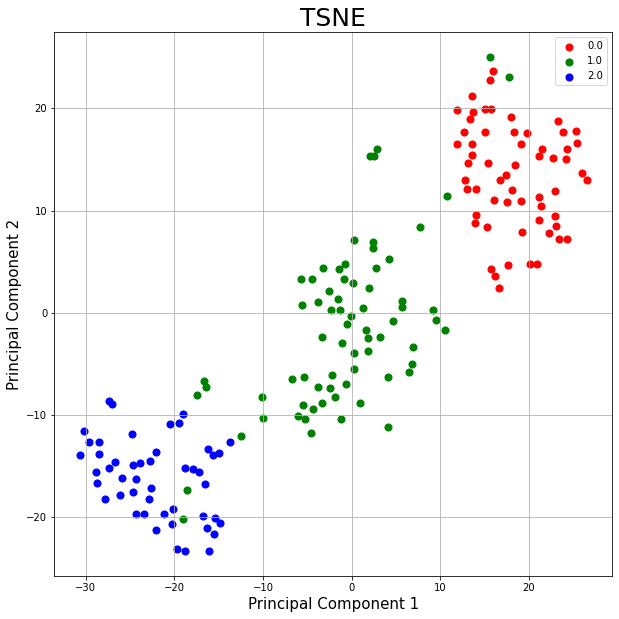

In [20]:
# Show the graphic.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TSNE', fontsize = 25)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = ftnseDf['target'] == target
    ax.scatter(ftnseDf.loc[indicesToKeep, 'PC 1']
               , ftnseDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

X_train.shape

(119, 13)

In [22]:
X_test.shape

(59, 13)

In [23]:
#Create the classifier.

clf=RandomForestClassifier(n_estimators=10, random_state=42)

clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [24]:
#Apply cross validation to evaluate the results.
scores=cross_val_score(clf,X_train,y_train.values.ravel(),cv=5)
scores

array([1.        , 0.91666667, 0.91666667, 0.91666667, 0.95652174])

In [25]:
#Calculate the mean and the standard deviation of the validation
print("Mean: %0.2f ; Standard Dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 0.94 ; Standard Dev.: 0.03)


In [26]:
#Apply PCA.

# Create PCA object.
pca = PCA(n_components=2)

#Apply PCA on training data
pComp=pca.fit_transform(X_train)

#Run PCA


principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,2.579072,0.038567
1,-4.244181,-0.907790
2,1.065278,2.421301
3,2.091564,1.225946
4,-2.913649,-1.378762


In [27]:
#Create the classifier

pcaclf=RandomForestClassifier(n_estimators=10,random_state=42)

pcaclf.fit(principalDf,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [28]:
#Apply cross validation
scores=cross_val_score(pcaclf,principalDf,y_train.values.ravel(),cv=5)
scores

array([0.95833333, 0.875     , 1.        , 0.95833333, 1.        ])

In [29]:
#Mean and standard deviation of the validation.
print("Mean: %0.2f ; Standard dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 0.96 ; Standard dev.: 0.05)


In [30]:
#Run TSNE.


X_embedded = TSNE(n_components=2,perplexity=15).fit_transform(X_train)


tsneDf = pd.DataFrame(data = X_embedded
             , columns = ['PC 1', 'PC 2'])
tsneDf.head()

,PC 1,PC 2
0,6.541089,-15.467674
1,-13.601492,20.695900
2,2.208303,-0.376793
3,-2.108628,-21.522167
4,-18.795782,24.457102


In [31]:
#Create the classifier

tclf=RandomForestClassifier(n_estimators=10, random_state=42 )

tclf.fit(tsneDf,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [32]:
scores=cross_val_score(tclf,tsneDf,y_train.values.ravel(),cv=5)
scores

array([0.91666667, 0.95833333, 1.        , 0.91666667, 0.86956522])

In [33]:
#Calculate mean and standard deviation of the validation
print("Mean: %0.2f ; Standard dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 0.93 ; Standard dev.: 0.04)


In [34]:
#Let's transform test data

PCA_test=pca.transform(X_test)

pcaTestDf = pd.DataFrame(data = PCA_test
             , columns = ['PC 1', 'PC 2'])

pcaTestDf.shape

(59, 2)

In [35]:
prediction=pcaclf.predict(pcaTestDf)
prediction

array([0., 0., 2., 0., 1., 0., 1., 2., 1., 2., 0., 2., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 2., 2., 2., 1., 1., 1., 0., 0., 1., 2., 0.,
       0., 0., 2., 2., 1., 2., 1., 1., 1., 1., 2., 0., 1., 1., 2., 0., 1.,
       0., 0., 2., 2., 1., 1., 0., 1.])

In [36]:
#Cross validation and metrics.
acc_score=accuracy_score(y_test,prediction)
acc_score

0.9830508474576272

In [37]:
#We get a 98% accuracy, let's see confussion matrix.
conf_matrix=confusion_matrix(y_test,prediction)
conf_matrix

array([[19,  1,  0],
       [ 0, 24,  0],
       [ 0,  0, 15]], dtype=int64)

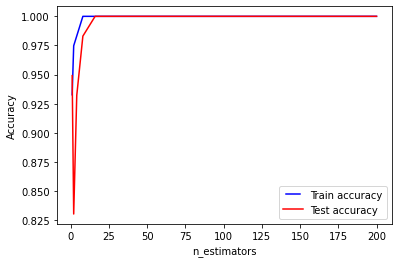

In [38]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
#Save precision data in arrays in order to show the graphic.

for estimator in n_estimators:
   clf = RandomForestClassifier(n_estimators=estimator,random_state=42)
   clf.fit(X_train,y_train.values.ravel())
   pred_train = clf.predict(X_train)
   acc_score_train = accuracy_score(y_train,pred_train)
   train_results.append(acc_score_train)
   pred_test = clf.predict(X_test)
   acc_score_test=accuracy_score(y_test,pred_test)
   test_results.append(acc_score_test)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

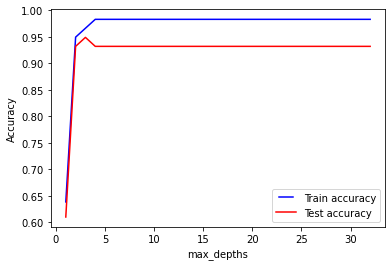

In [39]:
#Continue with max_depth

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

#Save precision data in arrays in order to show the graphic
for max_depth in max_depths:
   clf = RandomForestClassifier(n_estimators=4,max_depth=max_depth,random_state=42)
   clf.fit(X_train,y_train.values.ravel())
   pred_train = clf.predict(X_train)
   acc_score_train = accuracy_score(y_train,pred_train)
   train_results.append(acc_score_train) 
   pred_test = clf.predict(X_test)
   acc_score_test=accuracy_score(y_test,pred_test)
   test_results.append(acc_score_test)


line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max_depths')
plt.show()

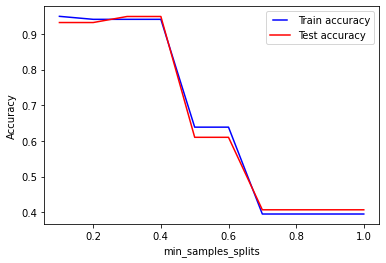

In [40]:
# min_samples_split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
test_results = []
train_results = []
#Save precision data in arrays in order to show the graphic

for min_samples_split in min_samples_splits:
   clf = RandomForestClassifier(n_estimators=4,max_depth=2,min_samples_split=min_samples_split,random_state=42)
   clf.fit(X_train,y_train.values.ravel())
   pred_train = clf.predict(X_train)
   acc_score_train = accuracy_score(y_train,pred_train)
   train_results.append(acc_score_train) 
   pred_test = clf.predict(X_test)
   acc_score_test=accuracy_score(y_test,pred_test)
   test_results.append(acc_score_test)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train accuracy')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.show()